\author{ProfFan}
# Introduction

This is the solution for DSP Autumn 2015 Homework 1.

# Utilities

In [1]:
function [y] = sigadd(x1,n1,x2,n2)
    n = min(min(n1),min(n2)):max(max(n1),max(n2));
    y1 = zeros(1,length(n)); y2 = y1;
    y1(find((n>=min(n1))&(n<=max(n1))==1))=x1;
    y2(find((n>=min(n2))&(n<=max(n2))==1))=x2;
    y = y1+y2;
end

# Exercise Problems

## Question 1

Implement a sample-by-sample multiplication:
$${x_1(n)} ∗ {x_2(n)} = {x_1(n)x_2(n)}$$

In [2]:
function [y,n] =  ssmul(x1,n1,x2,n2)
    n = min(min(n1),min(n2)):max(max(n1),max(n2));
    y1 = zeros(1,length(n));
    y2 = y1;
    y1(find((n>=min(n1))&(n<=max(n1))==1))=x1;
    y2(find((n>=min(n2))&(n<=max(n2))==1))=x2;
    y = y1+y2;
end

In [3]:
ssmul([1,2,3],1:3,[2,3,3],2:4)

ans =

   1   4   6   3



##Question 2
Implement $y(n) = {x(n − k)}$ in MATLAB

In [4]:
function [y,n] = tshift(x,n1, dn)
    y = x;
    n = n1 - dn;
end

In [5]:
tshift([1 2 3],1:3,1)

ans =

   1   2   3



##Question 3
Generate the following signals over the specified interval.

(1) $x(n) = n[u(n) − u(n − 10)] + 10e^{−0.3(n−10)}[u(n − 10) − u(n − 20)]$, $0\leq n \leq 20$.

In [11]:
u = ones(1,21)
u10 = [zeros(1,10) ones(1,11)]
u20 = [zeros(1,20) ones(1,1)]
x = [0:20].*(u-u10)+10*exp(-0.3*([0:20]-10)).*(u10-u20);

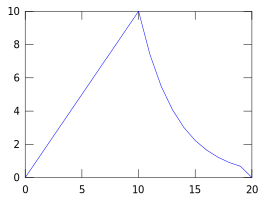

In [12]:
plot(0:20,x)

(2) $x(n) = cos(0.04 \pi n) + 0.2\omega(n)$ ,$0 \leq n \leq 50$ , where $\omega(n)$ is a Gaussian random sequence with zero mean and unit variance.

In [13]:
x = cos(0.04*pi*[0:50])+0.2*normrnd(0,1,1,51);

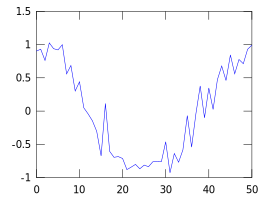

In [14]:
plot(0:50,x)

## Question 4
Let the rectangular pulse $x(n) = u(n) − u(n − 10)$ be an input to an LTI system with impulse response:
$$h(n) = (0.9)^nu(n)$$
Determine the output $y(n)$.

In [15]:
y = conv((0.9).^[0:20],u-u10);

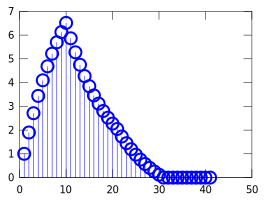

In [16]:
stem(1:length(y),y)

# Question 5

Let
$$x(n) = [3,11,7,\underline{0},−1,4,2]$$
be the input sequence, and the impulse response of system is:
$$h(n) = [\underline{0},0,0,0.9,0,0,0,0.1]$$
Using xcorr to compute the cross-correlation between output y(n) and input x(n).

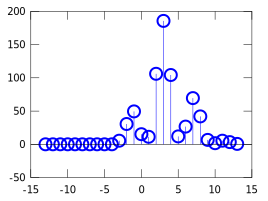

In [26]:
x = [3,11,7,0,-1,4,2];
h = [0,0,0,0.9,0,0,0,0.1];
nx = [-3:3];
nh = [0:7];
y = conv(x,h);

nz = [-length(y)+1:length(y)-1];

z = xcorr(y,x);
stem(nz,z)